In [18]:
import pandas as pd
import numpy as np
import requests
import cv2
import matplotlib.pyplot as plt
import urllib.request


In [50]:
FileName = "images_file.csv"
FilePath = 'Images/'

df = pd.read_csv('project_data.csv')


In [22]:
Female_1 = cv2.imread("Female1.jpg")
Female_2 = cv2.imread("Female2.jpg")
Female_3 = cv2.imread("Female3.jpg")
Female_4 = cv2.imread("Female4.jpg")
Female_4d = cv2.imread("Female4d.jpg")



Male_1 = cv2.imread("Male1.jpg")
Male_2 = cv2.imread("Male2.jpg")
Male_3 = cv2.imread("Male3.jpg")

None_img = cv2.imread("NoneIMG.jpg")

def check_female(img):
    
    female_and_female_dif1 = cv2.subtract(img,Female_1)
    female_and_female_diff1 = np.where(female_and_female_dif1)
    FandF1 = not np.any(female_and_female_diff1)

    female_and_female_dif2 = cv2.subtract(img,Female_2)
    female_and_female_diff2 = np.where(female_and_female_dif2)
    FandF2 = not np.any(female_and_female_diff2)

    female_and_female_dif3 = cv2.subtract(img,Female_3)
    female_and_female_diff3 = np.where(female_and_female_dif3)
    FandF3 = not np.any(female_and_female_diff3)

    female_and_female_dif4 = cv2.subtract(img,Female_4)
    female_and_female_diff4 = np.where(female_and_female_dif4)
    FandF4 = not np.any(female_and_female_diff4)


    return (FandF1 or FandF2 or FandF3 or FandF4)

def check_Male(img):
    male_and_male_dif = cv2.subtract(img,Male_1)
    male_and_male_diff = np.where(male_and_male_dif)
    MandM1 = not np.any(male_and_male_diff)
            
    male_and_male_dif = cv2.subtract(img,Male_2)
    male_and_male_diff = np.where(male_and_male_dif)
    MandM2 = not np.any(male_and_male_diff)
            
    male_and_male_dif = cv2.subtract(img,Male_3)
    male_and_male_diff = np.where(male_and_male_dif)
    MandM3 = not np.any(male_and_male_diff)
    

    return (MandM1 or MandM2 or MandM3)

def check_imogy_gender(img):

    try:
        if(img.shape!=(153, 153, 3)):
            img = np.resize(img,(153, 153, 3))
    except AttributeError as error:
        return None
    gender = None
    if(check_female(img)==True):
        gender = 'Female'
    else:
        if(check_Male(img)==True):
            gender = 'Male'
            
    return gender

In [29]:
def get_gender(image_url, i):

    response = requests.get(image_url)
    image_name = FilePath + 'ImageNum' + str(i) + '.jpg'
    with open(image_name, 'wb') as file:
        file.write(response.content)
   
    img = cv2.imread(image_name)
    final_gender = None
    gender = cv2.dnn.readNetFromCaffe("gender.prototxt","gender.caffemodel")
    detector_path = "haarcascade_frontalface_alt.xml"
    detector = cv2.CascadeClassifier(detector_path)
    faces = detector.detectMultiScale(img,1.3,5)
    if(len(faces)>0):
        x, y ,w, h = faces[0]
        detected_face = img[int(y):int(y+h), int(x):int(x+w)]
        plt.imshow(detected_face[:,:,::-1])
        detected_face = cv2.resize(detected_face,(224,224))
        detected_face_blob = cv2.dnn.blobFromImage(detected_face)
        gender.setInput(detected_face_blob)
        gender_result = gender.forward()
        if(np.argmax(gender_result[0])==0):
            final_gender = "Female"
        else:
            final_gender = "Male"
            
            
    if(final_gender==None):
        final_gender = check_imogy_gender(img)
        
    return final_gender

<ipython-input-30-90e3cbad353d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['User_Gender'][ind]=gend


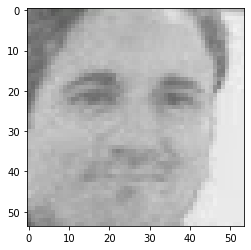

In [30]:
i = 1
for ind in df[df['User_Gender'].isnull()].index:
    img = df['User_img'][ind]
    image_url = str(img)

    gend = get_gender(image_url, i)
    if(gend!=None):
        df['User_Gender'][ind]=gend
    i = i + 1



In [35]:
df.User_Gender.isnull().sum()

1435

In [43]:
df.User_Gender.describe()

count     1511
unique       2
top       Male
freq      1048
Name: User_Gender, dtype: object

In [44]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,User_Name,User_img,User_url,Challange_Name,Programming_Lang,Sol_Code,User_Score,User's_Comments,User_Gender
0,0,0,0,0,TomGo,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/TomGo,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,5,Male
1,1,1,1,1,jgrier,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/jgrier,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,0,NaN
2,2,2,2,2,buddhaben,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/buddhaben,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male
3,3,3,3,3,dumel20,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/dumel20,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,10,0,NaN
4,4,4,4,4,sameerkhan2k1,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/sameerkhan2k1,Min Window Substring,Java,import java.util.*; \nimport java.io.*;\n\ncla...,9,0,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,2941,2941,2941,2941,mpalm1234,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/mpalm1234,SQL Member Count,Swift,/* write your SQL query below */\n\nSELECT Rep...,10,0,NaN
2942,2942,2942,2942,2942,mag31903034,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/mag31903034,SQL Member Count,Swift,/* write your SQL query below */\nSELECT a.rep...,10,-1,NaN
2943,2943,2943,2943,2943,Hucast734,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/Hucast734,SQL Member Count,Swift,/* write your SQL query below */\nSELECT * FRO...,10,-1,NaN
2944,2944,2944,2944,2944,Balaji468,https://s3-us-west-1.amazonaws.com/coderbytepr...,/profile/Balaji468,SQL Member Count,Swift,/* write your SQL query below */\n\n\nSELECT R...,10,-1,NaN


In [45]:

df.to_csv("project_data.csv")


In [41]:
df[df['User_Gender']=='Female'].shape

(463, 13)

In [42]:
df[df['User_Gender']=='Male'].shape

(1048, 13)